In [14]:
import librosa
import os
import matplotlib.pyplot as plt
import numpy as np



In [22]:
# Example: Load an audio file
root_path = "../data/"
word_name = 'word_1'
file_name = 'sample1/words/'+ word_name+ '.wav'
signal, sr = librosa.load(root_path + file_name, sr=None)
duration = librosa.get_duration(y=signal, sr=sr)
# print(f'Sampling rate: {sr}, Duration: {duration}s')

# # Plot a small portion of the audio signal
# plt.figure(figsize=(10, 4))
# plt.plot(signal[:sr])  # Plot first second of audio
# plt.title('Audio Signal (First Second)')
# plt.xlabel('samples')
# plt.ylabel('Amplitude')
# plt.show()

In [18]:
sr * 0.146451

6458.4891

In [9]:
1 / len(signal[:sr])

2.2675736961451248e-05

In [11]:
1 / 0.000001

1000000.0

In [23]:
import pandas as pd

# Construct the full path to the Excel file
excel_file_path = os.path.join(root_path, file_name.replace('.wav', '.xlsx'))

# Read the Excel file
df_excel = pd.read_excel(excel_file_path)

# Display the first few rows of the dataframe
df_excel.head()

,down,up,key
0,0.476268,0.659993,W
1,0.708025,0.803857,O
2,0.908119,1.011801,R
3,1.196815,1.293331,K


21003.42321000002
31223.898090000013
40048.03467000003
52779.55032


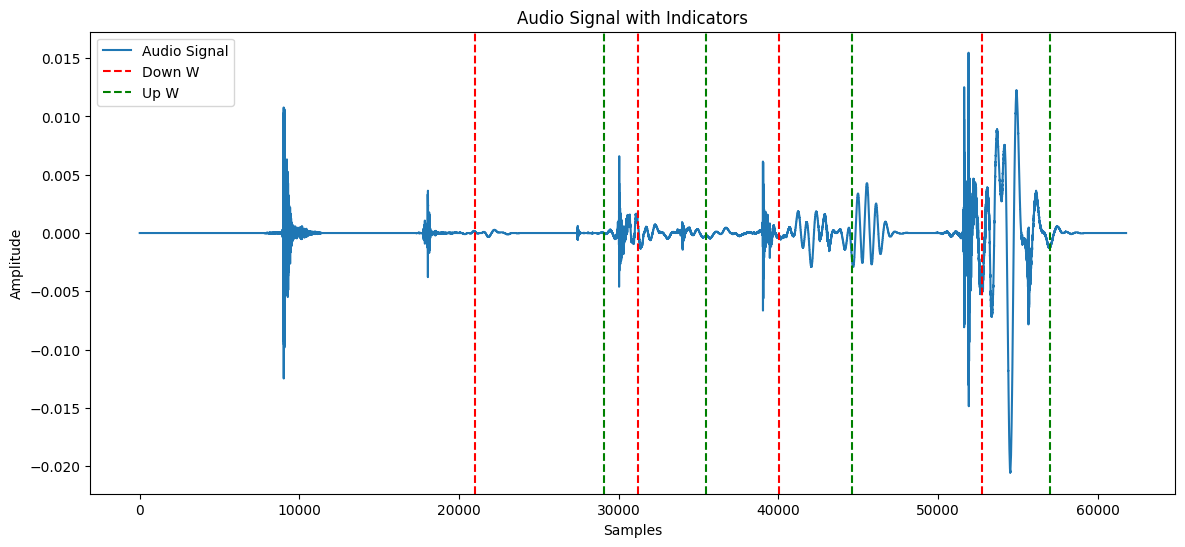

In [24]:
# Plot the audio signal
plt.figure(figsize=(14, 6))
plt.plot(signal, label='Audio Signal')

# Add indicators from df_excel
for index, row in df_excel.iterrows():
    down_sample = int(row['down'] * sr)
    print(row['down'] * sr)
    up_sample = int(row['up'] * sr)
    plt.axvline(x=down_sample, color='r', linestyle='--', label=f"Down {row['key']}" if index == 0 else "")
    plt.axvline(x=up_sample, color='g', linestyle='--', label=f"Up {row['key']}" if index == 0 else "")

plt.title('Audio Signal with Indicators')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

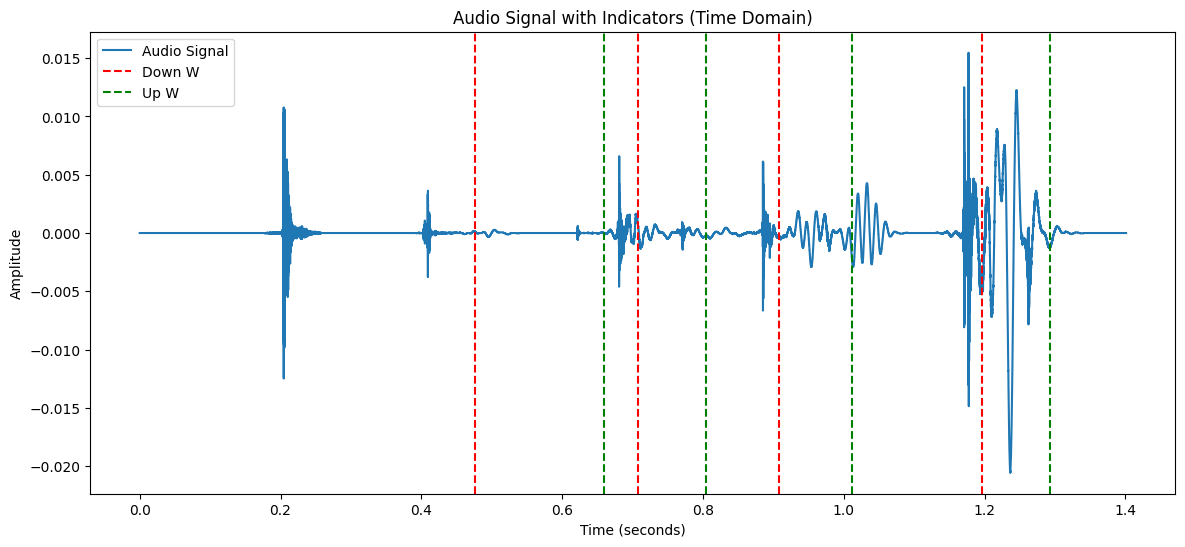

In [25]:
# Plot the audio signal with time on the x-axis
plt.figure(figsize=(14, 6))
time = np.linspace(0, len(signal) / sr, num=len(signal))
plt.plot(time, signal, label='Audio Signal')

# Add indicators from df_excel
for index, row in df_excel.iterrows():
    down_time = row['down']
    up_time = row['up']
    plt.axvline(x=down_time, color='r', linestyle='--', label=f"Down {row['key']}" if index == 0 else "")
    plt.axvline(x=up_time, color='g', linestyle='--', label=f"Up {row['key']}" if index == 0 else "")

plt.title('Audio Signal with Indicators (Time Domain)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()